# <font face="Trebuchet MS" size=6 color=black >COMP41680 Assignment 1

## <font face="Trebuchet MS" size=4 color=black >**Abstract:**

   <font face="Trebuchet MS" size=2.5 color=black >    &emsp; &emsp; The assignment focuses on the impact of the only four trillion-dollar technology companies in the world on the overall U.S. financial system during the 20 years from 2000 to 2020. These four companies are Microsoft, Apple, Google, Amazon, respectively. the S&P 500 index represents the performance of U.S. Financial market.

In [1]:
# the library needed
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import matplotlib

## <font face="Trebuchet MS" size=4 color=black >Task 1: Identify the suitable API 

### <font face="Trebuchet MS" size=3 color=green > API introduction

<font face="Trebuchet MS" size=2.5 color=black >&emsp; &emsp; The API used for finding stock data of listed companies is provided by https://www.alphavantage.co/  
    &emsp; &emsp; The sample style of API: https://www.alphavantage.co/queryfunction=TIME_SERIES_INTRADAY&symbol=MSFT&interval=5min&outputsize=full&apikey=demo  
    &emsp; &emsp; This API is completely free but with response bandwidth limitations, the normal user can only request access once every five seconds. The key I received work here is : '5QHL69CLJE8MN7CX'
    

In [2]:
key = '5QHL69CLJE8MN7CX'

## <font face="Trebuchet MS" size=4 color=black >Task 2: Raw data collection

&emsp; &emsp; <font face="Trebuchet MS" size=2.5 color=black >Because the API only provide the historical data of companies listed but not the market composite index. The data of S&P 500 is provided by https://query1.finance.yahoo.com/v7/finance/download/%5EGSPC?period1=1551706975&period2=1583329375&interval=1d&events=history&crumb=paF1DgiNzgA. This link will provide the csv file of S&P 500 index directly. The data of these four companies are gotten from the API given.

###  <font face="Trebuchet MS" size=3 color=black > 2.1 Get data from API  

In [3]:
## the format of file is Json ##

url_Amazon = 'https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=AMZN&apikey=' + key
url_Google = 'https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=GOOGL&apikey=' + key
url_Microsoft = 'https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=MSFT&apikey=' + key
url_Apple = 'https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=AAPL&apikey=' + key

###  <font face="Trebuchet MS" size=3 color=black >2.2 Parsing and transferring 

&emsp; &emsp;  <font face="Trebuchet MS" size=2.5 color=black > The data provided is stored in Json. Parsing it and transferring into datafram.  
      
 &emsp; &emsp;  <font face="Trebuchet MS" size=2.5 color=green >**Please do not execute the code block more than once in a short time ,otherwise the server is denied access and error exist.** 

In [4]:
def Json_to_df(url , key):
    
    ## Parsing the data ##
    json_data = requests.get(url).json();
    json_price = json_data["Monthly Time Series"]
    
    ## Transferring into datafram ##
    
    df = pd.DataFrame(json_price)
    df = df.T
    return df

df_Amazon = Json_to_df(url_Amazon, key)
df_Google = Json_to_df(url_Google, key)
df_Microsoft= Json_to_df(url_Microsoft, key)
df_Apple = Json_to_df(url_Apple, key)

print(df_Google.head())


              1. open    2. high     3. low   4. close 5. volume
2020-04-16  1124.0000  1275.7500  1075.0800  1257.4300  29013823
2020-03-31  1351.3900  1408.1900  1008.8700  1161.9500  78534591
2020-02-28  1461.6500  1530.7400  1268.2100  1339.2500  41565155
2020-01-31  1348.4100  1500.5800  1346.4900  1432.7800  33629150
2019-12-31  1302.5600  1367.0700  1277.0500  1339.3900  28279817


###  <font face="Trebuchet MS" size=3 color=black > 2.3 Storing in appropriate format

&emsp; &emsp;  <font face="Trebuchet MS" size=2.5 color=black > The data is stored uniformly in CSV format for further data processing.

In [5]:
def df_write_in_csv(location , df):
    df.to_csv(location, index= True)
    
## file path ##

location_Am = 'Amazon.csv'
location_Go = 'Google.csv'
location_Mi = 'Microsoft.csv'
location_Ap = 'Apple.csv'

df_write_in_csv(location_Am, df_Amazon);
df_write_in_csv(location_Go, df_Google);
df_write_in_csv(location_Mi, df_Microsoft);
df_write_in_csv(location_Ap, df_Apple);

##   <font face="Trebuchet MS" size=3 color=black > Task 3: Data processing 

&emsp; &emsp; <font face="Trebuchet MS" size=2.5 color=black > The data of the four companies all need some common processing (such as Misiing data handling. However, the data of Apple and Google need to be processed specially for some reasons.

### <font face="Trebuchet MS" size=3 color=black > 3.1: Reading the data from the csv files saved.

In [6]:
def read_file(path):
    df = pd.read_csv(path)
    df.rename(columns = {'Unnamed: 0': 'open_time'}, inplace = True) # rename the column[0], it doesn't have initial name.
    return df

## file storage path ##

path_AM = "Amazon.csv"
path_Go = "Google.csv"
path_Mi = "Microsoft.csv"
path_Ap = "Apple.csv"
path_sp500 = "s&p_500.csv"

## store the data in dataframe ##

df_Amazon = read_file(path_AM)
df_Google = read_file(path_Go)
df_Apple = read_file(path_Ap)
df_Microsoft = read_file(path_Mi)
df_sp500 =  read_file(path_sp500)

print(df_Amazon.head())

    open_time  1. open  2. high   3. low  4. close  5. volume
0  2020-04-16  1932.97  2461.00  1889.15   2408.19   65072179
1  2020-03-31  1906.49  1996.33  1626.03   1949.72  163796017
2  2020-02-28  2010.60  2185.95  1811.13   1883.75   92555977
3  2020-01-31  1875.00  2055.72  1815.34   2008.72   84743300
4  2019-12-31  1804.40  1901.40  1735.00   1847.84   68522009


### <font face="Trebuchet MS" size=3 color=black > 3.2: Drop the redundant data out.

<font face="Trebuchet MS" size=2.5 color=black >&emsp; &emsp The high and low price of the stock, trading volume is not the focus of the study, for the closing price and the opening price, select the opening price and regard it as the stock price of the day. Therefore, extracting the data of column 0 and column 1 out. 

In [7]:
df_Amazon = df_Amazon.iloc[:,[0,1]]
df_Apple = df_Apple.iloc[:,[0,1]]
df_Microsoft = df_Microsoft.iloc[:,[0,1]]
df_Google = df_Google.iloc[:,[0,1]]
df_sp500 = df_sp500.iloc[:,[0,1]]

print(df_Amazon.head())

    open_time  1. open
0  2020-04-16  1932.97
1  2020-03-31  1906.49
2  2020-02-28  2010.60
3  2020-01-31  1875.00
4  2019-12-31  1804.40


### <font face="Trebuchet MS" size=3 color=black > 3.3: Missing value handling

**&emsp; &emsp; <font face="Trebuchet MS" size=2.5 color=green  >It is not suitable to replace the missing data with the mean value.**<font face="Trebuchet MS" size=2.5 color=black > Because mean value will much larger or smaller than real price of stocks. It is better to use the last day opening price to replace them.  
    &emsp; &emsp; For example, assuming the price of one Amazon share is 1700 dollars on 01/01/2020 and the data of 02/01 get missed. In this way, replace the missing data with 1700 instead of the average value of whole list.

In [8]:
## the function fillna could replace the Missing value with the previous adjacent value ##

df_Amazon["1. open"].fillna( method = 'ffill' , inplace= True)
df_Apple["1. open"].fillna( method = 'ffill' , inplace= True)
df_Microsoft["1. open"].fillna( method = 'ffill' , inplace= True)
df_Google["1. open"].fillna( method = 'ffill' , inplace= True)
df_sp500["Open"].fillna(method = 'ffill' , inplace= True)

### <font face="Trebuchet MS" size=3 color=black > 3.4 Data normolization

&emsp; &emsp; <font face="Trebuchet MS" size=2.5 color=black > Firstly, unify all data into an integer format and store in the list correspondly.  

In [9]:
def to_List(df):
    col = df.iloc[:,1]
    arr = col.values
    list = []
    for number in arr:
        number = int(number)
        list.append(number)
    return list

date = df_Amazon.iloc[:,0].values  ## Extract time axis ##
value_Amazon = to_List(df_Amazon)
value_Google = to_List(df_Google)
value_Microsoft = to_List(df_Microsoft)
value_Apple = to_List(df_Apple)
value_sp500 = to_List(df_sp500)
date = df_Amazon.iloc[:,0].values

&emsp; &emsp; <font face="Trebuchet MS" size=2.5 color=black > Secondly, since the data provided by the API is arranged in an inverse sequence, as the table shown in 3.2, the first data is the opening price of Amazon's stock on March 4. Therefore, reversing the order of data set.

In [10]:
value_Amazon.reverse()
value_Apple.reverse()
value_Microsoft.reverse()
value_Google.reverse()

&emsp; &emsp; <font face="Trebuchet MS" size=2.5 color=black > Thirdly,Handle data length inconsistencies. Since Google went public on August 19, 2004, this makes its data sets longer than others. For this reason, the length of Google's data was extended to 0 from 2000 to 2004.

In [11]:
print('Google length : ',len(value_Google))
print('Amazon length: ', len(value_Amazon))
print('time_length: ',   len(date))

Google length :  188
Amazon length:  240
time_length:  240


In [12]:
count = 0
i = len(date) - len(value_Google) 

## Extent the length ##

while(count < i):
    value_Google.insert(0,0)
    count  = count + 1
    
print('Google length : ',len(value_Google))

Google length :  240


&emsp; &emsp;<font face="Trebuchet MS" size=2.5 color=black > The Fourth, the problem of stock splits. Google and Apple divided their stock on 04/30/2014 and 06/30/2014, respectively. ( 1 share to 2 shares for Google and 1 share to 7 shares for Apple). in order to reflect the stock's growth, multiply Google's stock price since April 2014 by 2, and correspondingly, Apple since June 2014 by 7.

In [13]:
##############################
## Apple share processing   ##
##############################

count = 0;
date = date[::-1]
for time in date:
    if(time == '2014-06-30'):
        break
    count = count + 1

count = count + 1
while (count < len(value_Apple)):
    value_Apple[count] = value_Apple[count] * 7
    count = count + 1
    
###############################
## Google share processing   ##
###############################

count2 = 0
for time in date:
    if(time == '2014-04-30'):
        break
    count2 = count2 + 1
count2 = count2 + 1

while (count2 < len(value_Google)):
    value_Google[count2] = value_Google[count2] * 2
    count2 = count2 + 1  

&emsp; &emsp;<font face="Trebuchet MS" size=2.5 color=black > The fifth, arrange the data in dataframe.

In [14]:
df = pd.DataFrame(list(zip(date, value_Microsoft, value_Apple, value_Google, value_Amazon,value_sp500)),
                  columns = ['open_time', 'Microsoft', 'Apple', 'Google', 'Amazon','S&P 500'])
print(df.head())

    open_time  Microsoft  Apple  Google  Amazon  S&P 500
0  2000-05-31         72    124       0      56     1366
1  2000-06-30         64     81       0      48     1498
2  2000-07-31         79     52       0      36     1452
3  2000-08-31         69     50       0      30     1420
4  2000-09-29         70     61       0      42     1454


## <font face="Trebuchet MS" size=3 color=black > Task 4：Matplotlib graphing

### <font face="Trebuchet MS" size= 3 color=black >4.1 The overall trend

&emsp; &emsp;<font face="Trebuchet MS" size=2.5 color=black > Looking at the development trend of these four companies over the past 20 years, in the long run, the stock price of the company can often reflect the actual value of the company. It can be seen that except for Microsoft, the other three companies show exponential growth.

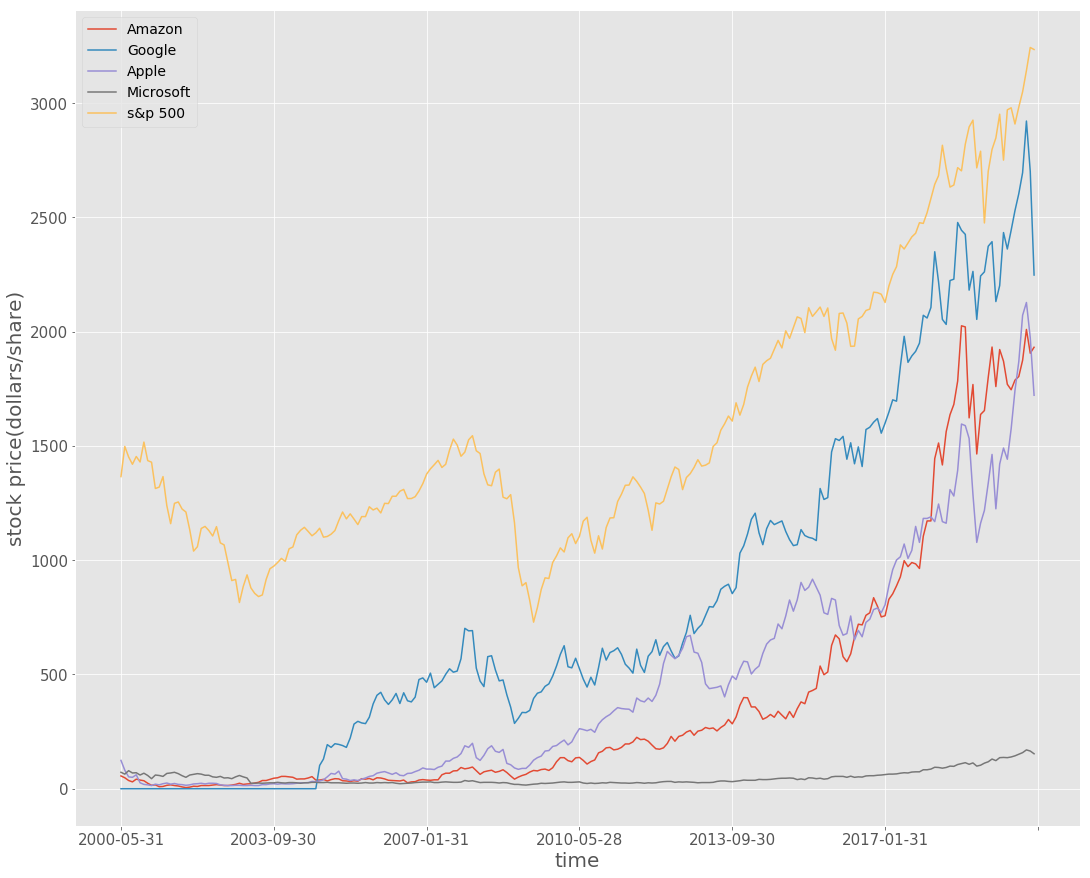

In [15]:
matplotlib.style.use('ggplot')

##   Record the time every 40 months ##
tick_spacing = 40

##  Set the size of graph ##

plt.rcParams['figure.figsize'] = (18.0, 15.0) 
fig, ax = plt.subplots(1,1)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.plot(date, value_Amazon,label = "Amazon")
ax.plot(date, value_Google,label = "Google")
ax.plot(date, value_Apple,label = "Apple")
ax.plot(date, value_Microsoft,label = "Microsoft")
ax.plot(date, value_sp500,label = "s&p 500")

## Set tag size ##

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("time", fontsize=20)
plt.ylabel("stock price(dollars/share)", fontsize=20)
ax.legend(prop={"size":14})
plt.show()

### <font face="Trebuchet MS" size= 3 color=black >4.2 Payoff diagram

&emsp; &emsp;<font face="Trebuchet MS" size=2.5 color=black > As to show the income investment objectively, make an assumption firstly.  
&emsp; &emsp; So let's say that one investor bought 100 shares of these four companies in 2000. in the same way, and another investor invest the S&P 500 index for the same amount. We call the stocks of these four companies a portfolio.  
    &emsp; &emsp; <font face="Trebuchet MS" size=2.5 color=green > However, the Google share get openned public in 2004. For this, Assuming the investor bought 100 shares of Google on 06/30/2004 and another one also invested S&P 500 for same amount. That means investors only can buy Google shares after the other three have been public for 54 months.

In [16]:
## Assuming buy 100 shares of these four compnies ##

portfolio_cost = (value_Apple[0] + value_Microsoft[0] + value_Amazon[0])* 100;  ## the investment cost  ##
c = portfolio_cost / value_sp500[0] ## The share of the S&P 500 index bought for the same amount ##                                         
c = int(c)

## After 54 months, bought 100 Google shares ##

j = (value_Google[54]*100)/value_sp500[54] 
j = int(j)  ## The amount of the S&P 500 index that 100 Google share equals to ##

print(portfolio_cost + value_Google[54]*100) ## The total investment cost ##
print(c + j)                                 ## The total amount of S&P 500 index ##


42400
32


&emsp; &emsp;<font face="Trebuchet MS" size=2.5 color=black >Store the return on your portfolio and the return on the S&P 500 in two linked lists

In [17]:
portfolio = [];
SP_500 = []

for i in range(0,240):
    value = (value_Apple[i] + value_Microsoft[i] + value_Amazon[i] + value_Google[i])*100;
    index = value_sp500[i]*c;
    
    ## Bought 100 Google shares ##
    if(i >= 54 and i < 55): 
        c = c + j
    SP_500.append(index)
    portfolio.append(value)

&emsp; &emsp;<font face="Trebuchet MS" size=2.5 color=black > Then plotting the payoff diagram.

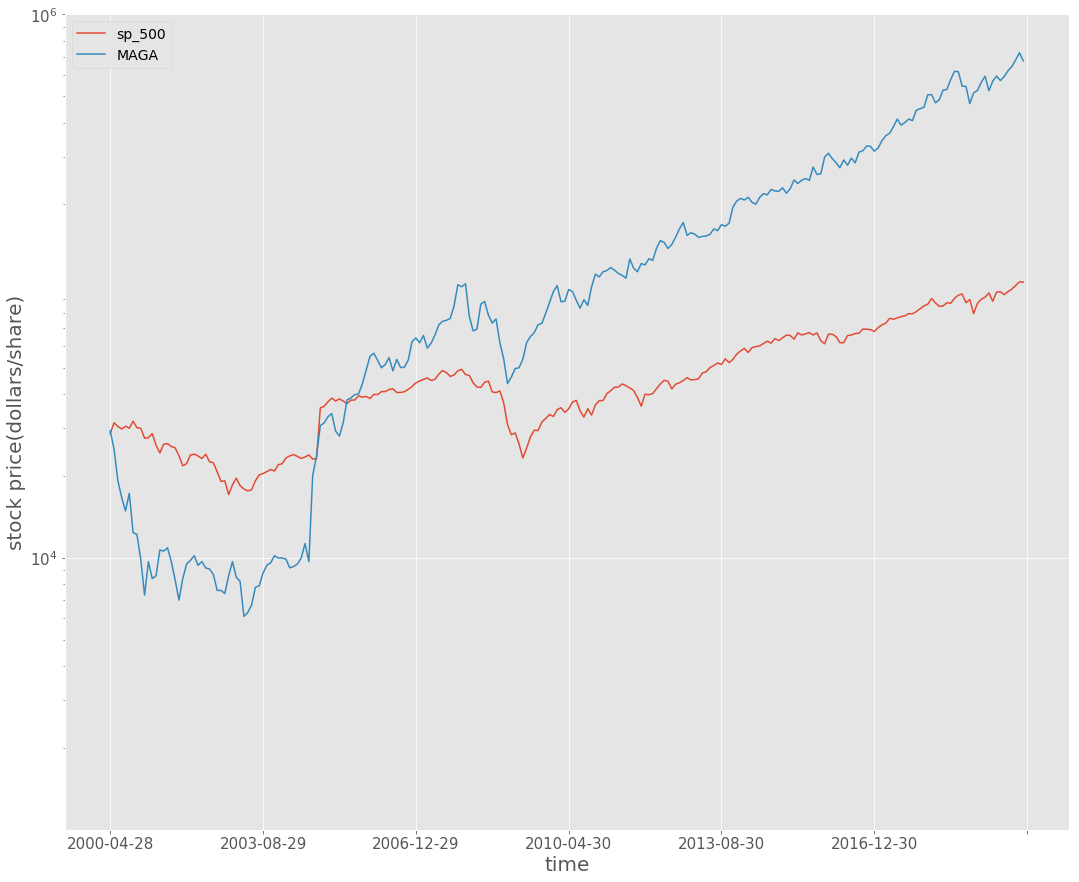

In [18]:
fig, ax2 = plt.subplots(1,1)
plt.rcParams['figure.figsize'] = (15.0, 10.0) 
ax2.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax2.set_ylim(10**3, 10**6)
ax2.set_yscale('log')
ax2.yaxis.set_major_locator(ticker.LogLocator(base=100.0, numticks=5))
ax2.plot(date, SP_500,label = "sp_500")
ax2.plot(date, portfolio,label = "MAGA")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("time", fontsize=20)
plt.ylabel("stock price(dollars/share)", fontsize=20)
ax2.legend(prop={"size":14})
plt.show()

&emsp; &emsp;<font face="Trebuchet MS" size=2.5 color=black >MAGA's portfolio did not beat the market until 2005, but it has outperformed the market since 2008 and the gap has widened from then on.However, it is very interesting to see that, it seems the market get leaded by these conpanies after 2008. From the persepctive of financial, It is surely no accident that the returns of the four companies show such a high correlation with the returns of the overall market.  
    &emsp; &emsp;As shown from the payoff diagram, there seems to be a correlation between the 20-year trends of the four companies and the SP 500.

### <font face="Trebuchet MS" size= 3 color=black > 4.3 Correlation study

&emsp; &emsp;<font face="Trebuchet MS" size= 2 color=black > The correlation between the portfolio and SP _500

In [19]:
print(np.corrcoef(SP_500,portfolio))

[[1.         0.96033502]
 [0.96033502 1.        ]]


&emsp; &emsp;<font face="Trebuchet MS" size= 2 color=black > From the image, it can be seen that there is a strong positive correlation between the two, which is consistent with 0.96

Text(0, 0.5, 'MAGA portfolio payoff between 2000 and 2020')

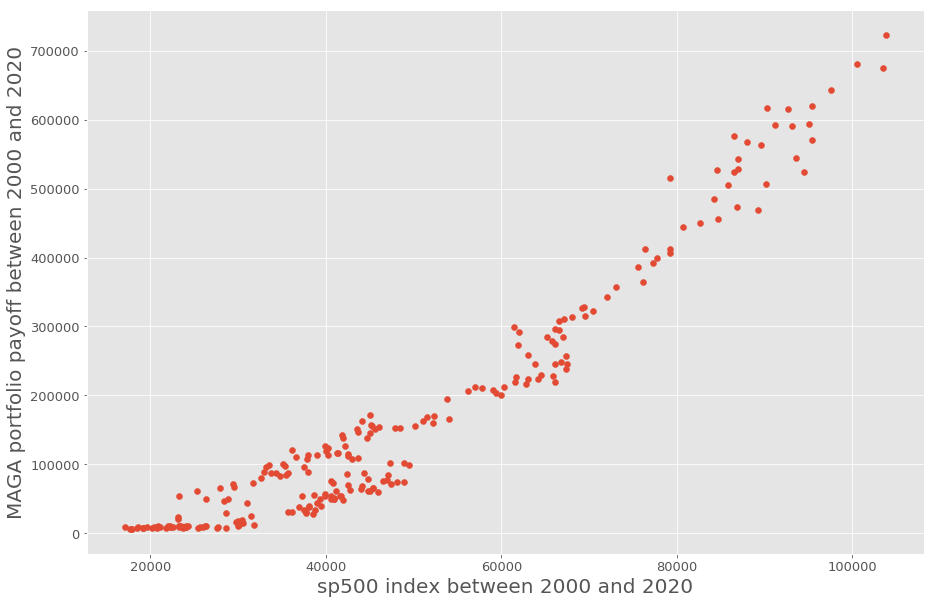

In [20]:
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.scatter(SP_500, portfolio);
plt.xlabel("sp500 index between 2000 and 2020",fontsize=20)
plt.ylabel("MAGA portfolio payoff between 2000 and 2020",fontsize=20)

&emsp; &emsp;<font face="Trebuchet MS" size=2.5 color=black >The extremely high positive correlation adds to the sense that these four trillion companies have a huge impact on the overall U.S. financial market. In fact, the 10-year bull market in the United States since 2008 has been closely related to the technology companies represented by these four companies.  
   &emsp; &emsp; According ton the report of CNN, The five largest companies in the S&P 500 -- all tech companies -- account for nearly 20% of the market value of the entire index. Apple (AAPL), Microsoft (MSFT), Amazon (AMZN), Google owner Alphabet (GOOGL) and Facebook (FB) are collectively worth 4.85 trillion dollars.The S&P 500 (SPY) has a market value of around $26.7 trillion.   
    
 

&emsp; &emsp; <font face="Trebuchet MS" size=2.5 color=black > That is to say, the total value of America's 500 most powerful companies is about 25 trillion dollars, of which about a fifth ($5 trillion) is concentrated in five companies. As you can imagine, these five companies are important to the entire U.S. financial system.


## <font face="Trebuchet MS" size=3 color=black > Task 5: The insight for future

&emsp; &emsp;<font face="Trebuchet MS" size=2.5 color=black > Select a few other non-tech stocks and create another portfolio to compare with the SP 500 to verify our conclusion that technology companies are the main drivers of the us economy. In addition, track the four companies' profits and cash flows over a decade to find their major contributions to the economy.  
    &emsp; &emsp;Anyway, we can only look back at the changes in the market, but we can't predict the market with that. No one knows who will be the next apple, the next amazon, and who will lead the economic development of the United States in the next ten years.